In [3]:
%pwd

'/media/drs/extra/Learn/code/mvi'

In [10]:
path = '/home/drs/Desktop/mvi_data/MVI/2081487/4832691/2081487_4832691_BH_Ax_LAVA+C_4_0_0_axial.nii'

In [44]:
import os 
import nrrd 
import csv 
import SimpleITK as sitk
import numpy as np 
import nibabel as nib 
import skimage.io as io
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from skimage import measure
import scipy

In [12]:
image = nib.load(path)
print(image)
# print(image.header['db_name'])
# print(image.header)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (512, 512, 88)
affine: 
[[ -0.78130001   0.           0.         186.73100281]
 [  0.          -0.78130001   0.         200.77999878]
 [  0.           0.           2.29999924 -57.83409882]
 [  0.           0.           0.           1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  88   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        0.7813    0.7813    2.2999992 0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration 

In [13]:
image_array = image.get_data()
print(type(image_array))
print(image_array.shape)

<class 'numpy.memmap'>
(512, 512, 88)


In [14]:
image_2d = image_array[:,:,50]
print(image_2d)
print(image_array[150, 200, 50])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
876


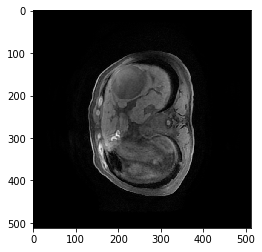

In [15]:
plt.imshow(image_2d, cmap='gray')
plt.show()

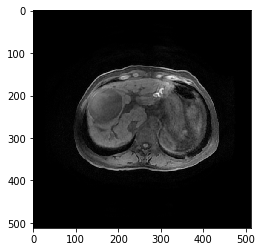

In [16]:
plt.imshow(image_2d.transpose((1, 0)), cmap='gray')
plt.show()

In [17]:
image_2d = image_2d.transpose((1, 0))

In [18]:
mask_path = '/home/drs/Desktop/mvi_data/MVI/2081487/4832691/2081487_4832691_BH_Ax_LAVA+C_4_0_0_axial_NC.nrrd'

In [19]:
mask_data, _ = nrrd.read(mask_path)
print(mask_data.shape)

(512, 512, 88)


In [20]:
mask_slice = list(set(np.nonzero(mask_data)[-1]))
print(mask_slice)

[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]


In [21]:
print(np.nonzero(mask_data[:,:,50]))

(array([130, 130, 130, ..., 210, 210, 210]), array([226, 227, 228, ..., 222, 223, 224]))


In [22]:
print(mask_data[130, 226, 50])

1


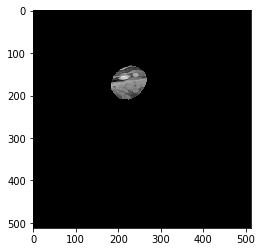

In [23]:
mask_image = np.multiply(image_2d, mask_data[:,:,50])
plt.imshow(mask_image, cmap='gray')
plt.show()

In [24]:
path = '/home/drs/Desktop/mvi_data/MVI'

In [25]:
for case in os.listdir(path):
#     print(case)
    case_path = os.path.join(path, case)
#     print(case_path)
    case2_path = os.path.join(case_path, os.listdir(case_path)[0])
    print(case2_path)

/home/drs/Desktop/mvi_data/MVI/3406080/5391011
/home/drs/Desktop/mvi_data/MVI/2081487/4832691
/home/drs/Desktop/mvi_data/MVI/4724952/4713989
/home/drs/Desktop/mvi_data/MVI/5178854/5368248
/home/drs/Desktop/mvi_data/MVI/3807435/3481089
/home/drs/Desktop/mvi_data/MVI/4782091/4791088
/home/drs/Desktop/mvi_data/MVI/4034320/3804995
/home/drs/Desktop/mvi_data/MVI/3210871/2579283
/home/drs/Desktop/mvi_data/MVI/8130824/3136764
/home/drs/Desktop/mvi_data/MVI/3265726/2645836
/home/drs/Desktop/mvi_data/MVI/3628724/3236501
/home/drs/Desktop/mvi_data/MVI/2945564/2224482


In [26]:
import glob
case_list = glob.glob('/home/drs/Desktop/mvi_data/MVI/*/*')
print(case_list)

['/home/drs/Desktop/mvi_data/MVI/3406080/5391011', '/home/drs/Desktop/mvi_data/MVI/2081487/4832691', '/home/drs/Desktop/mvi_data/MVI/4724952/4713989', '/home/drs/Desktop/mvi_data/MVI/5178854/5368248', '/home/drs/Desktop/mvi_data/MVI/3807435/3481089', '/home/drs/Desktop/mvi_data/MVI/4782091/4791088', '/home/drs/Desktop/mvi_data/MVI/4034320/3804995', '/home/drs/Desktop/mvi_data/MVI/3210871/2579283', '/home/drs/Desktop/mvi_data/MVI/8130824/3136764', '/home/drs/Desktop/mvi_data/MVI/3265726/2645836', '/home/drs/Desktop/mvi_data/MVI/3628724/3236501', '/home/drs/Desktop/mvi_data/MVI/2945564/2224482']


In [27]:
case_list[0]

'/home/drs/Desktop/mvi_data/MVI/3406080/5391011'

In [28]:
LAVA_list = glob.glob(case_list[0] + '/*LAVA*')
LAVA_list.sort()
for i in LAVA_list:
    print(i)

/home/drs/Desktop/mvi_data/MVI/3406080/5391011/3406080_5391011_BH_Ax_LAVA-xv+C__2_0_0_axial.nii
/home/drs/Desktop/mvi_data/MVI/3406080/5391011/3406080_5391011_BH_Ax_LAVA-xv+C__2_0_0_axial_NC.nrrd
/home/drs/Desktop/mvi_data/MVI/3406080/5391011/3406080_5391011_BH_Ax_LAVA-xv+C__2_0_0_axial_NC_liver.nrrd
/home/drs/Desktop/mvi_data/MVI/3406080/5391011/3406080_5391011_BH_Ax_LAVA-xv+C__2_0_1_axial.nii
/home/drs/Desktop/mvi_data/MVI/3406080/5391011/3406080_5391011_BH_Ax_LAVA-xv+C__2_0_1_axial_ART.nrrd
/home/drs/Desktop/mvi_data/MVI/3406080/5391011/3406080_5391011_BH_Ax_LAVA-xv+C__2_0_1_axial_ART_liver.nrrd
/home/drs/Desktop/mvi_data/MVI/3406080/5391011/3406080_5391011_BH_Ax_LAVA-xv+C__2_0_2_axial.nii
/home/drs/Desktop/mvi_data/MVI/3406080/5391011/3406080_5391011_BH_Ax_LAVA-xv+C__2_0_2_axial_PV.nrrd
/home/drs/Desktop/mvi_data/MVI/3406080/5391011/3406080_5391011_BH_Ax_LAVA-xv+C__2_0_2_axial_PV_liver.nrrd
/home/drs/Desktop/mvi_data/MVI/3406080/5391011/3406080_5391011_BH_Ax_LAVA-xv+C__4_0_0_axial.

In [29]:
case_list[0]

'/home/drs/Desktop/mvi_data/MVI/3406080/5391011'

In [30]:
case_list[0].split('/')[-2]

'3406080'

In [37]:
img = np.array(Image.open('/home/drs/Desktop/mvi_data/art/2081487_57art_0.jpg'))
img.shape

(512, 512)

In [38]:
img[160, 220]

170

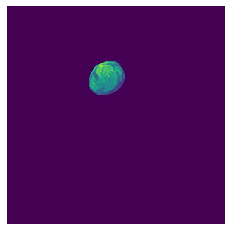

In [39]:
plt.figure('temp')
plt.imshow(img)
plt.axis('off')
plt.show()

In [41]:
img_npy = np.load('/home/drs/Desktop/mvi_data/art_npy/2081487_57_art_0.npy')

In [42]:
print(img_npy.shape)

(512, 512)


In [43]:
img_npy[160, 220]

1.0602076

In [44]:
case_list[7]

'/home/drs/Desktop/mvi_data/MVI/3210871/2579283'

In [45]:
idx = -1
item_list = os.listdir(case_list[7])
item_list.sort()
for item in item_list:
    idx += 1
    print(item)
    if item.split('_')[-1] == 'ART.nrrd':
        break 
assert idx > 0
print(idx)

3210871_2579283_ep2d_diff_b50_800_p2_ADC_DFC_MIX_3_0_0_axial.nii
3210871_2579283_ep2d_diff_b50_800_p2_TRACEW_DFC_MIX__2_0_0_axial.nii
3210871_2579283_ep2d_diff_b50_800_p2_TRACEW_DFC_MIX__2_0_0_axial_DWI0.nrrd
3210871_2579283_ep2d_diff_b50_800_p2_TRACEW_DFC_MIX__2_0_1_axial.nii
3210871_2579283_ep2d_diff_b50_800_p2_TRACEW_DFC_MIX__2_0_1_axial_DWI1.nrrd
3210871_2579283_t1_fl2d_opp-in_tra_p2_mbh__5_0_0_axial.nii
3210871_2579283_t1_fl2d_opp-in_tra_p2_mbh__5_0_0_axial_OP.nrrd
3210871_2579283_t1_fl2d_opp-in_tra_p2_mbh__5_0_0_axial_OP_liver.nrrd
3210871_2579283_t1_fl2d_opp-in_tra_p2_mbh__5_1_0_axial.nii
3210871_2579283_t1_fl2d_opp-in_tra_p2_mbh__5_1_0_axial_IP.nrrd
3210871_2579283_t1_fl2d_opp-in_tra_p2_mbh__5_1_0_axial_IP_liver.nrrd
3210871_2579283_t1_vibe_dixon_cor_caipi6_bh_320_F__12_0_0_coronal.nii
3210871_2579283_t1_vibe_dixon_cor_caipi6_bh_320_W__11_0_0_coronal.nii
3210871_2579283_t1_vibe_dixon_cor_caipi6_bh_320_in_10_0_0_coronal.nii
3210871_2579283_t1_vibe_dixon_cor_caipi6_bh_320_opp__9_

In [46]:
art_image_path = case_list[7] + '/' + item_list[idx - 1]
art_mask_path = case_list[7] + '/' + item_list[idx]
art_liver_path = case_list[7] + '/' + item_list[idx + 1]

In [47]:
print(art_mask_path)
print(art_image_path)

/home/drs/Desktop/mvi_data/MVI/3210871/2579283/3210871_2579283_t1_vibe_fs_tra_caipi4_bh_7_0_0_axial_ART.nrrd
/home/drs/Desktop/mvi_data/MVI/3210871/2579283/3210871_2579283_t1_vibe_fs_tra_caipi4_bh_7_0_0_axial.nii


In [48]:
art_image = nib.load(art_image_path)
art_array = art_image.get_data()

In [49]:
print(art_array.shape)

(320, 260, 72)


In [50]:
art_mask_array, _ = nrrd.read(art_mask_path)
print(art_mask_array.shape)

(320, 260, 72)


In [51]:
new_array = np.multiply(art_mask_array[:, :, 52], art_array[:, :, 52])

In [52]:
print(new_array.shape)
print(new_array[80, 110])
# print(np.nonzero(new_array))

(320, 260)
285


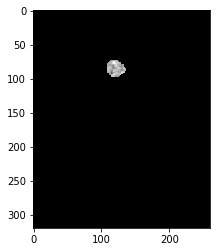

In [53]:
plt.imshow(new_array, cmap='gray')
plt.show()

In [54]:
mask = new_array > 0
print(mask)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [55]:
lower = np.percentile(new_array[mask], 0.2)
print(lower)
upper = np.percentile(new_array[mask], 99.8)
print(upper)

158.224
420.6940000000001


In [56]:
print(new_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [57]:
new_array[mask & (new_array < lower)] = lower
new_array[mask & (new_array > upper)] = upper
print(new_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [58]:
mean = new_array[mask].mean()
std = new_array[mask].std()
new_array = new_array.astype(dtype=np.float32)
new_array[mask] = (new_array[mask] - mean) / std
print(new_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [59]:
import torchvision.models as models 
resnet50 = models.resnet50(pretrained=False)
print(resnet50)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [60]:
resnet152 = models.resnet152(pretrained=False)
print(resnet152)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [61]:
new_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
np.unique(new_array)

array([-3.4155402e+00, -3.1545947e+00, -2.7750378e+00, -2.7275932e+00,
       -2.6801486e+00, -2.5852592e+00, -2.5378146e+00, -2.4666476e+00,
       -2.3480361e+00, -2.3005915e+00, -2.1582577e+00, -2.1345353e+00,
       -2.0633683e+00, -2.0159237e+00, -1.9447569e+00, -1.8973122e+00,
       -1.8735899e+00, -1.8024230e+00, -1.7787007e+00, -1.7549783e+00,
       -1.6600891e+00, -1.6363667e+00, -1.5889221e+00, -1.5651999e+00,
       -1.5414776e+00, -1.5177553e+00, -1.4465883e+00, -1.4228660e+00,
       -1.3991437e+00, -1.3754214e+00, -1.3516990e+00, -1.3279767e+00,
       -1.2805321e+00, -1.2568098e+00, -1.2330874e+00, -1.2093651e+00,
       -1.1856428e+00, -1.1619205e+00, -1.1144760e+00, -1.0907536e+00,
       -1.0670313e+00, -1.0433090e+00, -1.0195867e+00, -9.9586433e-01,
       -9.7214204e-01, -9.4841975e-01, -9.2469740e-01, -9.0097511e-01,
       -8.7725282e-01, -8.5353047e-01, -8.2980818e-01, -8.0608588e-01,
       -7.8236353e-01, -7.5864124e-01, -7.3491895e-01, -7.1119660e-01,
      

In [68]:
max = sorted(np.unique(new_array))[-1]
min = sorted(np.unique(new_array))[0]
print(max, min)

2.7997055 -3.4155402


In [64]:
type(new_array)

numpy.ndarray

In [66]:
type(new_array[0][0])

numpy.float32

In [70]:
array = np.load('/home/drs/Desktop/mvi_data/art_npy/3807435_54_art_1.npy')

In [71]:
np.unique(array)

array([-1.6745726, -1.6703684, -1.6661643, ...,  3.3872285,  3.3914325,
        3.3998408], dtype=float32)

In [72]:
resnet18 = models.resnet18(pretrained=False)
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [73]:
mask, _ = nrrd.read('/home/drs/Desktop/mvi_data/MVI/2081487/4832691/2081487_4832691_BH_Ax_LAVA+C_4_0_1_axial_ART.nrrd')

In [75]:
mask.shape

(512, 512, 88)

In [88]:
print(set(np.nonzero(mask[...,58])[0]))
print(set(np.nonzero(mask[...,58])[1]))

{124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207}
{191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274}


In [93]:
kernel_size = 20
kernel = np.ones((kernel_size, kernel_size))
new_mask = np.zeros((512, 512))
new_mask = cv2.dilate(mask[..., 58], kernel, iterations=1)

In [94]:
print(set(np.nonzero(new_mask)[0]))
print(set(np.nonzero(new_mask)[1]))

{115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217}
{182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278

In [95]:
path

'/home/drs/Desktop/mvi_data/MVI'

In [97]:
exception = '/home/drs/Desktop/mvi_data/exception'

In [98]:
case_list

['/home/drs/Desktop/mvi_data/MVI/3406080/5391011',
 '/home/drs/Desktop/mvi_data/MVI/2081487/4832691',
 '/home/drs/Desktop/mvi_data/MVI/4724952/4713989',
 '/home/drs/Desktop/mvi_data/MVI/5178854/5368248',
 '/home/drs/Desktop/mvi_data/MVI/3807435/3481089',
 '/home/drs/Desktop/mvi_data/MVI/4782091/4791088',
 '/home/drs/Desktop/mvi_data/MVI/4034320/3804995',
 '/home/drs/Desktop/mvi_data/MVI/3210871/2579283',
 '/home/drs/Desktop/mvi_data/MVI/8130824/3136764',
 '/home/drs/Desktop/mvi_data/MVI/3265726/2645836',
 '/home/drs/Desktop/mvi_data/MVI/3628724/3236501',
 '/home/drs/Desktop/mvi_data/MVI/2945564/2224482']

In [100]:
exception_list = glob.glob(exception + '/*/*')

In [101]:
exception_list

['/home/drs/Desktop/mvi_data/exception/1287429/4659158']

In [104]:
phase_list = os.listdir(exception_list[0])

In [105]:
phase_list

['MRI_4659158_5_0.csv',
 'MRI_4659158_1_0.csv',
 '1287429_4659158_BH_Ax_3D_DE_IN_OUT_3_0_0_axial.nii',
 '1287429_4659158_BH_Ax_LAVA+C_6_0_0_axial_DL.nrrd',
 '1287429_4659158_BH_Ax_LAVA+C_4_0_0_axial_NC_liver.nrrd',
 '1287429_4659158_BH_Ax_LAVA+C_4_0_1_axial_ART.nrrd',
 '1287429_4659158_BH_Ax_LAVA+C_4_0_0_axial.nii',
 '1287429_4659158_BH_Ax_LAVA+C_4_0_2_axial_PV.nrrd',
 '1287429_4659158_BH_Ax_3D_DE_IN_OUT_3_1_0_axial.nii',
 '1287429_4659158_BH_Ax_LAVA+C_4_0_0_axial_NC.nrrd',
 '1287429_4659158_RTr_Ax_DWI_B=600_2_0_0_axial.nii',
 '1287429_4659158_BH_Ax_3D_DE_IN_OUT_3_1_0_axial_IP.nrrd',
 '1287429_4659158_BH_Ax_LAVA+C_4_0_1_axial.nii',
 '1287429_4659158_BH_Ax_3D_DE_IN_OUT_3_0_0_axial_OP.nrrd',
 'MRI_4659158_4_0.csv',
 '1287429_4659158_RTr_Ax_fs_T2_1_0_0_axial.nii',
 'MRI_4659158_6_0.csv',
 '1287429_4659158_BH_Ax_LAVA+C_6_0_0_axial.nii',
 '1287429_4659158_COR__LAVA+C__5_0_0_coronal.nii',
 '1287429_4659158_RTr_Ax_fs_T2_1_0_0_axial_fs_T2_liver.nrrd',
 '1287429_4659158_BH_Ax_3D_DE_IN_OUT_3_1_0

In [106]:
phase_list.sort()
print(phase_list)

['1287429_4659158_BH_Ax_3D_DE_IN_OUT_3_0_0_axial.nii', '1287429_4659158_BH_Ax_3D_DE_IN_OUT_3_0_0_axial_OP.nrrd', '1287429_4659158_BH_Ax_3D_DE_IN_OUT_3_0_0_axial_OP_liver.nrrd', '1287429_4659158_BH_Ax_3D_DE_IN_OUT_3_1_0_axial.nii', '1287429_4659158_BH_Ax_3D_DE_IN_OUT_3_1_0_axial_IP.nrrd', '1287429_4659158_BH_Ax_3D_DE_IN_OUT_3_1_0_axial_IP_liver.nrrd', '1287429_4659158_BH_Ax_LAVA+C_4_0_0_axial.nii', '1287429_4659158_BH_Ax_LAVA+C_4_0_0_axial_NC.nrrd', '1287429_4659158_BH_Ax_LAVA+C_4_0_0_axial_NC_liver.nrrd', '1287429_4659158_BH_Ax_LAVA+C_4_0_1_axial.nii', '1287429_4659158_BH_Ax_LAVA+C_4_0_1_axial_ART.nrrd', '1287429_4659158_BH_Ax_LAVA+C_4_0_1_axial_ART_liver.nrrd', '1287429_4659158_BH_Ax_LAVA+C_4_0_2_axial.nii', '1287429_4659158_BH_Ax_LAVA+C_4_0_2_axial_PV.nrrd', '1287429_4659158_BH_Ax_LAVA+C_4_0_2_axial_PV_liver.nrrd', '1287429_4659158_BH_Ax_LAVA+C_6_0_0_axial.nii', '1287429_4659158_BH_Ax_LAVA+C_6_0_0_axial_DL.nrrd', '1287429_4659158_BH_Ax_LAVA+C_6_0_0_axial_DL_liver.nrrd', '1287429_4659

In [107]:
idx = -1
for item in phase_list:
    idx += 1
    if item.split('_')[-1] == 'ART.nrrd':
        break
assert idx > 0
print(idx)
print(phase_list[idx])

10
1287429_4659158_BH_Ax_LAVA+C_4_0_1_axial_ART.nrrd


In [108]:
art_image_path = exception_list[0] + '/' + phase_list[idx - 1]
print(art_image_path)

/home/drs/Desktop/mvi_data/exception/1287429/4659158/1287429_4659158_BH_Ax_LAVA+C_4_0_1_axial.nii


In [109]:
art_mask_path = exception_list[0] + '/' + phase_list[idx]
art_liver_path = exception_list[0] + '/' + phase_list[idx + 1]

In [110]:
art_image = nib.load(art_image_path)
art_array = art_image.get_data()
art_mask_array, _ = nrrd.read(art_mask_path)
art_mask_slice = list(set(np.nonzero(art_mask_array)[-1]))

In [113]:
largest_area = 0
largest_slice = 0
for idx in art_mask_slice:
    img_labeled = measure.label(art_mask_array[:, :, idx], connectivity=2)
    prop = measure.regionprops(img_labeled)
    area = prop[0].area
    if area > largest_area:
        largest_area = area
        largest_slice = idx 

In [114]:
a = [1, 2, 3]
b = [4, 5, 6]
c = [7, 8, 9]
abc = zip(a, b, c)

In [115]:
for (x, y, z) in abc:
    print(x, y, z)

1 4 7
2 5 8
3 6 9


In [117]:
if 3 not in b:
    print('no')

no


In [118]:
a = {'1': 1, '2': 2}
if '1' in a: 
    print('yes')

yes


In [125]:
d = {}
a = 'a'
d[a] = 1
d[a]
d[a] += 1
d[a]

2

In [4]:
import SimpleITK as sitk

In [2]:
path = '/home/drs/Desktop/mvi_data/MVI/2081487/4832691/'

In [3]:
idx = -1
for item in sorted(os.listdir(path)):
    idx += 1
    if item.endswith('ART.nrrd'):
        slice = idx
        break 
print(slice)

10


In [4]:
image = nib.load(os.path.join(path, sorted(os.listdir(path))[idx-1]))
print(image.shape)
image_header = image.header
print(image_header)

(512, 512, 88)
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  88   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        0.7813    0.7813    2.2999992 0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 186.731
qoffset_y       : 200.78
qoffse

In [5]:
mask_data, _ = nrrd.read(os.path.join(path, sorted(os.listdir(path))[idx]))
print(mask_data.shape)

(512, 512, 88)


In [6]:
mask_slice = list(set(np.nonzero(mask_data)[-1]))
largest_area = 0
largest_slice = 0
for idx in mask_slice:
    img_labeled = measure.label(mask_data[..., idx], connectivity=2)
    prop = measure.regionprops(img_labeled)
    area = prop[0].area
    if area > largest_area:
        largest_area = area
        largest_slice = idx

In [7]:
print(largest_slice)

58


In [10]:
cv2.imshow(mask_data[..., largest_slice])
cv2.waitKey(0)

TypeError: imshow() missing required argument 'mat' (pos 2)

In [8]:
print(mask_data[..., largest_slice].shape)

(512, 512)


In [9]:
print((np.nonzero(mask_data[..., largest_slice])))

(array([124, 124, 124, ..., 207, 207, 207]), array([246, 247, 248, ..., 235, 236, 237]))


In [10]:
np.sum(mask_data[..., largest_slice])

5556

In [11]:
print(image_header['pixdim'])

[1.        0.7813    0.7813    2.2999992 0.        0.        0.
 0.       ]


In [12]:
ratio = image_header['pixdim'][1]
print(ratio)

0.7813


In [16]:
mask = np.array(mask_data[..., largest_slice], np.uint8)
print(np.sum(mask))
canny = cv2.Canny(mask, 1, 100)
print(np.sum(canny))

5556
0


In [29]:
mm = 10
pix = mm / ratio
print(pix)
pix = int(np.round(pix))
print(pix)

12.799180716505344
13


In [27]:
new_mask = np.zeros((mask.shape[0], mask.shape[1]))
print(new_mask.shape)
print(np.sum(new_mask))

(512, 512)
0.0


In [32]:
mask_nonzero = np.nonzero(mask_data[..., largest_slice])
mask_idx = list(zip(mask_nonzero[0], mask_nonzero[1]))
for i in range(len(mask_idx)):
    x, y = mask_idx[i]
    for m in range(pix * 2 + 1):
        for n in range(pix * 2 + 1):
            if (0 < x-pix+m < mask.shape[0] and 0 < y-pix+n < mask.shape[1]):
                new_mask[x-pix+m, y-pix+n] = 1

In [33]:
print(np.sum(new_mask))

10600.0


In [34]:
print(np.nonzero(new_mask))

(array([111, 111, 111, ..., 220, 220, 220]), array([233, 234, 235, ..., 248, 249, 250]))


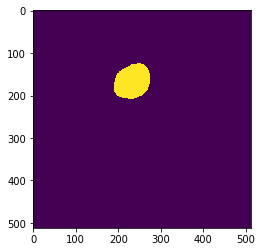

In [38]:
plt.imshow(mask_data[..., largest_slice])

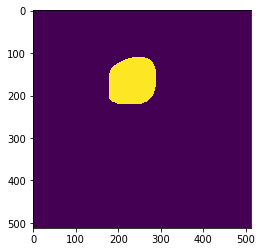

In [39]:
plt.imshow(new_mask)

In [3]:
path = '/home/drs/Desktop/mvi_data/Case/616747_2189098_Ax_LAVA+C__3_0_1_axial_ART.nii'

In [4]:
image = nib.load(path)
print(image)
data = image.get_data()

<class 'nibabel.nifti1.Nifti1Image'>
data shape (400, 400, 184)
affine: 
[[ -1.           0.           0.         197.56100464]
 [  0.          -1.           0.         186.29200745]
 [  0.           0.           1.         -69.28320312]
 [  0.           0.           0.           1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 400 400 184   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 

In [5]:
print(data.shape)

(400, 400, 184)


In [6]:
print(data[...,95])

[[-0.4709967 -0.4709967 -0.4709967 ... -0.4709967 -0.4709967 -0.4709967]
 [-0.4709967 -0.4709967 -0.4709967 ... -0.4709967 -0.4709967 -0.4709967]
 [-0.4709967 -0.4709967 -0.4709967 ... -0.4709967 -0.4709967 -0.4709967]
 ...
 [-0.4709967 -0.4709967 -0.4709967 ... -0.4709967 -0.4709967 -0.4709967]
 [-0.4709967 -0.4709967 -0.4709967 ... -0.4709967 -0.4709967 -0.4709967]
 [-0.4709967 -0.4709967 -0.4709967 ... -0.4709967 -0.4709967 -0.4709967]]


In [8]:
print(data[150,150,95])

2.3977535


In [9]:
path2 = '/home/drs/Desktop/mvi_data/Case/50634_2000137_Ax_LAVA+C__4_0_1_axial_ART.nii'

In [10]:
image2 = nib.load(path2)
print(image2)
data2 = image2.get_data()
print(data2.shape)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (400, 400, 184)
affine: 
[[ -1.           0.           0.         202.68200684]
 [  0.          -1.           0.         199.60899353]
 [  0.           0.           1.         -93.86810303]
 [  0.           0.           0.           1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 400 400 184   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 

In [11]:
print(data2)

[[[-0.5507163 -0.5507163 -0.5507163 ... -0.5507163 -0.5507163 -0.5507163]
  [-0.5507163 -0.5507163 -0.5507163 ... -0.5507163 -0.5507163 -0.5507163]
  [-0.5507163 -0.5507163 -0.5507163 ... -0.5507163 -0.5507163 -0.5507163]
  ...
  [-0.5507163 -0.5507163 -0.5507163 ... -0.5507163 -0.5507163 -0.5507163]
  [-0.5507163 -0.5507163 -0.5507163 ... -0.5507163 -0.5507163 -0.5507163]
  [-0.5507163 -0.5507163 -0.5507163 ... -0.5507163 -0.5507163 -0.5507163]]

 [[-0.5507163 -0.5507163 -0.5507163 ... -0.5507163 -0.5507163 -0.5507163]
  [-0.5507163 -0.5507163 -0.5507163 ... -0.5507163 -0.5507163 -0.5507163]
  [-0.5507163 -0.5507163 -0.5507163 ... -0.5507163 -0.5507163 -0.5507163]
  ...
  [-0.5507163 -0.5507163 -0.5507163 ... -0.5507163 -0.5507163 -0.5507163]
  [-0.5507163 -0.5507163 -0.5507163 ... -0.5507163 -0.5507163 -0.5507163]
  [-0.5507163 -0.5507163 -0.5507163 ... -0.5507163 -0.5507163 -0.5507163]]

 [[-0.5507163 -0.5507163 -0.5507163 ... -0.5507163 -0.5507163 -0.5507163]
  [-0.5507163 -0.55071

In [12]:
print(data2[113,173,133])

2.1835635


In [13]:
print(np.max(data))

9.923399


In [14]:
print(np.min(data))

-0.4709967


In [15]:
print(np.max(data2))

9.244578


In [16]:
print(np.min(data2))

-0.5507163


In [17]:
image = sitk.ReadImage(path)
print(image)

Image (0x56008e966a80)
  RTTI typeinfo:   itk::Image<float, 3u>
  Reference Count: 1
  Modified Time: 962
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 942
  UpdateMTime: 961
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [400, 400, 184]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [400, 400, 184]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [400, 400, 184]
  Spacing: [1, 1, 1]
  Origin: [-197.561, -186.292, -69.2832]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
1 0 0
0 1 0
0 0 1

  PointToIndexMatrix: 
1 0 0
0 1 0
0 0 1

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x56008dab6fb0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, float>
      Reference Count: 1
      Modified Time: 958

In [18]:
path = '/home/drs/Desktop/mvi_data/MVI/2081487/4832691/2081487_4832691_BH_Ax_LAVA+C_4_0_1_axial.nii'

In [19]:
image = sitk.ReadImage(path)
print(image)

Image (0x56008e92a3e0)
  RTTI typeinfo:   itk::Image<short, 3u>
  Reference Count: 1
  Modified Time: 1152
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1130
  UpdateMTime: 1151
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 88]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 88]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 88]
  Spacing: [0.7813, 0.7813, 2.3]
  Origin: [-186.731, -200.78, -57.8341]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.7813 0 0
0 0.7813 0
0 0 2.3

  PointToIndexMatrix: 
1.27992 0 0
0 1.27992 0
0 0 0.434783

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x56008e9a5500)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, short>
      R

In [29]:
data = sitk.GetArrayFromImage(image)
print(data.shape)

(88, 512, 512)


In [21]:
data = np.transpose(data, [2, 1, 0])
print(data.shape)

(512, 512, 88)


In [30]:
inputsize = image.GetSize()
inputspacing = image.GetSpacing()
print(inputsize, inputspacing)

(512, 512, 88) (0.7813000082969666, 0.7813000082969666, 2.299999237060547)


In [26]:
outspacing = [1, 1, 1]
outsize = [0, 0, 0]
transform = sitk.Transform()
transform.SetIdentity()
outsize[0] = int(inputsize[0] * inputspacing[0] / outspacing[0] + 0.5)
outsize[1] = int(inputsize[1] * inputspacing[1] / outspacing[1] + 0.5)
outsize[2] = int(inputsize[2] * inputspacing[2] / outspacing[2] + 0.5)
print(outsize)

[400, 400, 202]


In [27]:
resampler = sitk.ResampleImageFilter()
resampler.SetTransform(transform)
resampler.SetInterpolator(sitk.sitkLinear)
resampler.SetOutputOrigin(image.GetOrigin())
resampler.SetOutputSpacing(outspacing)
resampler.SetOutputDirection(image.GetDirection())
resampler.SetSize(outsize)
newimage = resampler.Execute(image)

In [28]:
print(newimage)

Image (0x56008ed3f610)
  RTTI typeinfo:   itk::Image<short, 3u>
  Reference Count: 1
  Modified Time: 1208
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1193
  UpdateMTime: 1207
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [400, 400, 202]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [400, 400, 202]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [400, 400, 202]
  Spacing: [1, 1, 1]
  Origin: [-186.731, -200.78, -57.8341]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
1 0 0
0 1 0
0 0 1

  PointToIndexMatrix: 
1 0 0
0 1 0
0 0 1

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x56008e8d3e90)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, short>
      Reference Count: 1
      Modified Time: 1

In [31]:
newdata = sitk.GetArrayFromImage(newimage)
print(newdata.shape)

(202, 400, 400)


In [36]:
outspacing = [1, 1, inputspacing[2]]
outsize = [0, 0, 0]
transform = sitk.Transform()
transform.SetIdentity()
outsize[0] = int(inputsize[0] * inputspacing[0] / outspacing[0] + 0.5)
outsize[1] = int(inputsize[1] * inputspacing[1] / outspacing[1] + 0.5)
outsize[2] = inputsize[2]
print(outsize)

[400, 400, 88]


In [37]:
resampler = sitk.ResampleImageFilter()
resampler.SetTransform(transform)
resampler.SetInterpolator(sitk.sitkLinear)
resampler.SetOutputOrigin(image.GetOrigin())
resampler.SetOutputSpacing(outspacing)
resampler.SetOutputDirection(image.GetDirection())
resampler.SetSize(outsize)
newimage = resampler.Execute(image)

In [38]:
print(newimage)

Image (0x56008ec64bc0)
  RTTI typeinfo:   itk::Image<short, 3u>
  Reference Count: 1
  Modified Time: 1311
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1297
  UpdateMTime: 1310
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [400, 400, 88]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [400, 400, 88]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [400, 400, 88]
  Spacing: [1, 1, 2.3]
  Origin: [-186.731, -200.78, -57.8341]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
1 0 0
0 1 0
0 0 2.3

  PointToIndexMatrix: 
1 0 0
0 1 0
0 0 0.434783

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x56008e839c60)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, short>
      Reference Count: 1
      Modified

In [40]:
newdata = sitk.GetArrayFromImage(newimage)
print(newdata.shape)

(88, 400, 400)


In [41]:
mask_path = '/home/drs/Desktop/mvi_data/MVI/2081487/4832691/2081487_4832691_BH_Ax_LAVA+C_4_0_1_axial_ART.nrrd'

In [42]:
mask_data, mask_head = nrrd.read(mask_path)
print(mask_data.shape, mask_head)

(512, 512, 88) OrderedDict([('type', 'unsigned short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([512, 512,  88])), ('space directions', array([[0.78130001, 0.        , 0.        ],
       [0.        , 0.78130001, 0.        ],
       [0.        , 0.        , 2.29999924]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'raw'), ('space origin', array([-186.73100281, -200.77999878,  -57.83409882]))])


In [47]:
origin_spacing = mask_head['space directions']
print(origin_spacing)

[[0.78130001 0.         0.        ]
 [0.         0.78130001 0.        ]
 [0.         0.         2.29999924]]


In [48]:
spacing = [origin_spacing[0, 0], origin_spacing[1, 1], origin_spacing[2, 2]]
print(spacing)

[0.7813000082969666, 0.7813000082969666, 2.299999237060547]


In [72]:
new_spacing = [1, 1, spacing[2]]
print(new_spacing)

[1, 1, 2.299999237060547]


In [52]:
print(np.array(list(spacing)))

[0.78130001 0.78130001 2.29999924]


In [55]:
resize_factor = origin_spacing / new_spacing
print(resize_factor)

[[0.78130001 0.         0.        ]
 [0.         0.78130001 0.        ]
 [0.         0.         1.        ]]


In [57]:
new_real_shape = mask_data.shape * resize_factor
print(new_real_shape)

[[400.02560425   0.           0.        ]
 [  0.         400.02560425   0.        ]
 [  0.           0.          88.        ]]


In [58]:
new_shape = np.round(new_real_shape)
print(new_shape)

[[400.   0.   0.]
 [  0. 400.   0.]
 [  0.   0.  88.]]


In [59]:
real_resize_factor = new_shape / mask_data.shape
print(real_resize_factor)

[[0.78125 0.      0.     ]
 [0.      0.78125 0.     ]
 [0.      0.      1.     ]]


In [62]:
new_spacing = origin_spacing / real_resize_factor
print(new_spacing)

[[1.00006401        nan        nan]
 [       nan 1.00006401        nan]
 [       nan        nan 2.29999924]]


/home/drs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [64]:
new_mask_data = scipy.ndimage.interpolation.zoom(mask_data, real_resize_factor)

TypeError: type numpy.ndarray doesn't define __round__ method

In [65]:
dicom_path = '/home/drs/Desktop/cqq_data/Mao_CT/CT1242473/art/'

In [66]:
seriesids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(dicom_path)
print(len(seriesids))

1


In [67]:
series_file_name = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(dicom_path)
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_name)
image3d = series_reader.Execute()
print(image3d.GetSize())

(512, 512, 43)


In [68]:
print(image3d)

Image (0x56008eb49610)
  RTTI typeinfo:   itk::Image<short, 3u>
  Reference Count: 1
  Modified Time: 2960
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1473
  UpdateMTime: 2959
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 43]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 43]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 43]
  Spacing: [0.683594, 0.683594, 5]
  Origin: [-180.95, -14.8, -231.5]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.683594 0 0
0 0.683594 0
0 0 5

  PointToIndexMatrix: 
1.46286 0 0
0 1.46286 0
0 0 0.2

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x56008edc8490)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, short>
      Referen

In [69]:
print(image3d.PixelSpacing)

AttributeError: 'Image' object has no attribute 'PixelSpacing'

In [70]:
spacing

[0.7813000082969666, 0.7813000082969666, 2.299999237060547]

In [73]:
new_spacing

[1, 1, 2.299999237060547]

In [76]:
resize_factor = origin_spacing / new_spacing
print(origin_spacing)

[[0.78130001 0.         0.        ]
 [0.         0.78130001 0.        ]
 [0.         0.         2.29999924]]


In [77]:
new_real_shape = mask_data.shape * resize_factor
print(new_real_shape)

[[400.02560425   0.           0.        ]
 [  0.         400.02560425   0.        ]
 [  0.           0.          88.        ]]


In [78]:
new_shape = np.round(new_real_shape)
print(new_shape)

[[400.   0.   0.]
 [  0. 400.   0.]
 [  0.   0.  88.]]


In [79]:
real_resize_factor = new_shape / mask_data.shape
print(real_resize_factor)

[[0.78125 0.      0.     ]
 [0.      0.78125 0.     ]
 [0.      0.      1.     ]]


In [80]:
real_resize_factor_list = [real_resize_factor[0, 0], real_resize_factor[1, 1], real_resize_factor[2, 2]]
print(real_resize_factor_list)

[0.78125, 0.78125, 1.0]


In [84]:
print(type(np.array(real_resize_factor_list)))

<class 'numpy.ndarray'>


In [85]:
new_mask_data = scipy.ndimage.interpolation.zoom(mask_data, real_resize_factor_list)

In [86]:
print(new_mask_data.shape)

(400, 400, 88)


In [87]:
path = '/home/drs/Desktop/mvi_data/MVI/2081487/4832691'

In [88]:
idx = -1
for item in sorted(os.listdir(path)):
    idx += 1
    if item.endswith('ART.nrrd'):
        break 

mask_data, mask_head = nrrd.read(os.path.join(path, sorted(os.listdir(path))[idx]))

In [89]:
mask_slice = list(set(np.nonzero(mask_data)[-1]))

In [91]:
mask_slice

[42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71]

In [94]:
origin_spacing = mask_head['space directions']
new_spacing = [1, 1, origin_spacing[2, 2]]
resize_factor = origin_spacing / new_spacing
new_real_shape = mask_data.shape * resize_factor
new_shape = np.round(new_real_shape)
real_resize_factor = new_shape / mask_data.shape
real_resize_factor_list = [real_resize_factor[0, 0], real_resize_factor[1, 1], real_resize_factor[2, 2]]
new_mask_data = scipy.ndimage.interpolation.zoom(mask_data, real_resize_factor_list, order=1)

In [96]:
print(new_mask_data.shape)
print(np.sum(new_mask_data))

(400, 400, 88)
68777


In [102]:
new_mask_data = scipy.ndimage.interpolation.zoom(mask_data, real_resize_factor_list, order=0)
print(np.sum(new_mask_data))

68783


In [98]:
new_mask_data = scipy.ndimage.interpolation.zoom(mask_data, real_resize_factor_list, order=1)
print(np.sum(new_mask_data))

68777


In [99]:
new_mask_data = scipy.ndimage.interpolation.zoom(mask_data, real_resize_factor_list, order=2)
print(np.sum(new_mask_data))

68787


In [100]:
new_mask_data = scipy.ndimage.interpolation.zoom(mask_data, real_resize_factor_list, order=3)
print(np.sum(new_mask_data))

68794


In [101]:
print(np.sum(mask_data))

112908


In [103]:
kernel_size = 12
kernel = np.ones((kernel_size, kernel_size))

In [105]:
for i in mask_slice:
    new_mask_data[:, :, i] = cv2.dilate(new_mask_data[:, :, i], kernel, iterations=1)    

In [107]:
convert_resize_factor = np.array(mask_data.shape) / np.array(new_mask_data.shape)
print(convert_resize_factor)

[1.28 1.28 1.  ]


In [109]:
expand_mask_data = scipy.ndimage.interpolation.zoom(new_mask_data, convert_resize_factor, order=0)
print(expand_mask_data.shape)

(512, 512, 88)


In [110]:
path

'/home/drs/Desktop/mvi_data/MVI/2081487/4832691'

In [117]:
nrrd_name = path.split('/')[-2] + '_' + path.split('/')[-1] + '_ARTmask_' + str(kernel_size / 2) + 'mm.nrrd'

In [118]:
print(nrrd_name)

2081487_4832691_ARTmask_6.0mm.nrrd


In [119]:
nrrd.write(os.path.join('/home/drs/Desktop/temp/', nrrd_name), expand_mask_data, mask_head)

In [126]:
a = 2
b = 1
c = 1

In [127]:
if a == b == c:
    print(a)